In [6]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
import random
from string import punctuation
import seaborn as sns

In [7]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
%matplotlib inline

# Set default plot size
plt.rcParams["figure.figsize"] = (15,8)

In [10]:
real = pd.read_csv("C:/Users/Suryansh/Desktop/fakenews/True.csv")
fake = pd.read_csv("C:/Users/Suryansh/Desktop/fakenews/Fake.csv")
fake['Authenticity'] = 'Fake'
real['Authenticity'] = 'Real'
news_data = fake.append(real)
news_data.head()

,title,text,subject,date,Authenticity
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [15]:
sw = stopwords.words('english')

new_words=('’','“', '”')

for i in new_words:
    sw.append(i)


# Convert to lower case
news_data['text'] = news_data['text'].str.lower()

# Tokenizing
news_data['tokenized_text'] = news_data['text'].apply(word_tokenize)

# Remove stopwords
news_data['filtered_text'] = news_data['tokenized_text'].apply(lambda x: [item for item in x if item not in sw])

# Remove punction
news_data['filtered_text'] = news_data['filtered_text'].apply(lambda x: [item for item in x if item not in punctuation])

# Check results
print(len(news_data['text'].iloc[0]),
      len(news_data['tokenized_text'].iloc[0]),
      len(news_data['filtered_text'].iloc[0]))

2893 599 287


In [16]:
news_data.head()

,title,text,subject,date,Authenticity,tokenized_text,filtered_text
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",Fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",Fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",Fake,"[on, friday, ,, it, was, revealed, that, forme...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",Fake,"[on, christmas, day, ,, donald, trump, announc...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",Fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


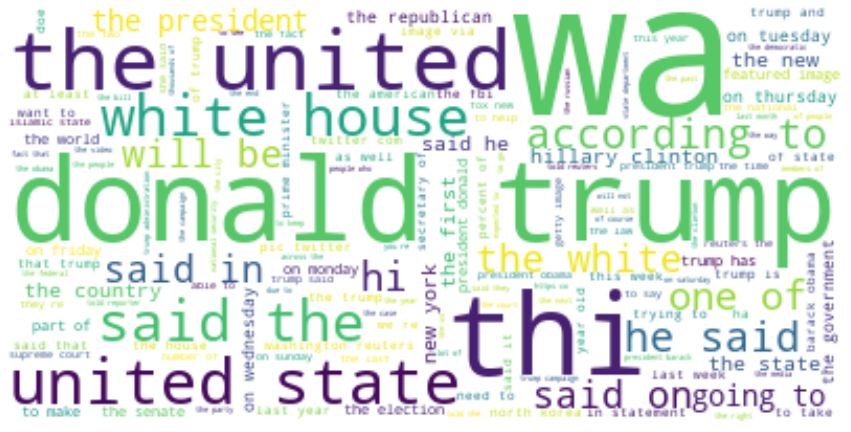

In [17]:
text = " ".join(text for text in news_data.text)

wordcloud = WordCloud(background_color="white", max_words=1000,
                      max_font_size=90, random_state=42).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
news_data_fake = news_data[news_data.Authenticity == 'Fake']
news_data_real = news_data[news_data.Authenticity == 'Real']

news_data_fake.head()

,title,text,subject,date,Authenticity,tokenized_text,filtered_text
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",Fake,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",Fake,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",Fake,"[on, friday, ,, it, was, revealed, that, forme...","[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",Fake,"[on, christmas, day, ,, donald, trump, announc...","[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",Fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


In [19]:
fake = news_data_fake.filtered_text.tolist()

fake_list = []
for sublist in fake:
    for item in sublist:
        fake_list.append(item)

real = news_data_real.filtered_text.tolist()

real_list = []
for sublist in real:
    for item in sublist:
        real_list.append(item)
        
all_words = news_data.filtered_text.tolist()

all_words_list = []
for sublist in all_words:
    for item in sublist:
        all_words_list.append(item)

In [20]:
vocab_fake = nltk.FreqDist(fake_list)
vocab_real = nltk.FreqDist(real_list)
vocab_all = nltk.FreqDist(all_words_list)

print('Fake most common words: ',vocab_fake.most_common(20),
     'Real most common words: ',vocab_real.most_common(20),
     'All most common words: ',vocab_real.most_common(20))

Fake most common words:  [('trump', 74233), ('said', 31145), ('people', 26011), ('president', 25739), ('would', 23461), ('one', 22992), ('clinton', 18079), ('obama', 17919), ('like', 17660), ('donald', 17234), ('also', 15242), ('new', 14198), ('news', 14195), ('us', 13917), ('even', 13690), ('hillary', 13673), ('white', 12797), ('time', 12790), ('state', 12543), ('via', 11353)] Real most common words:  [('said', 99035), ('trump', 54248), ('u.s.', 38460), ('would', 31526), ('reuters', 28410), ('president', 26397), ('state', 19728), ('government', 18287), ('new', 16784), ('house', 16519), ('states', 16513), ('also', 15946), ('united', 15576), ('republican', 15344), ('people', 15138), ('told', 14244), ('could', 13707), ('one', 12675), ('last', 12613), ('party', 12436)] All most common words:  [('said', 99035), ('trump', 54248), ('u.s.', 38460), ('would', 31526), ('reuters', 28410), ('president', 26397), ('state', 19728), ('government', 18287), ('new', 16784), ('house', 16519), ('states', 

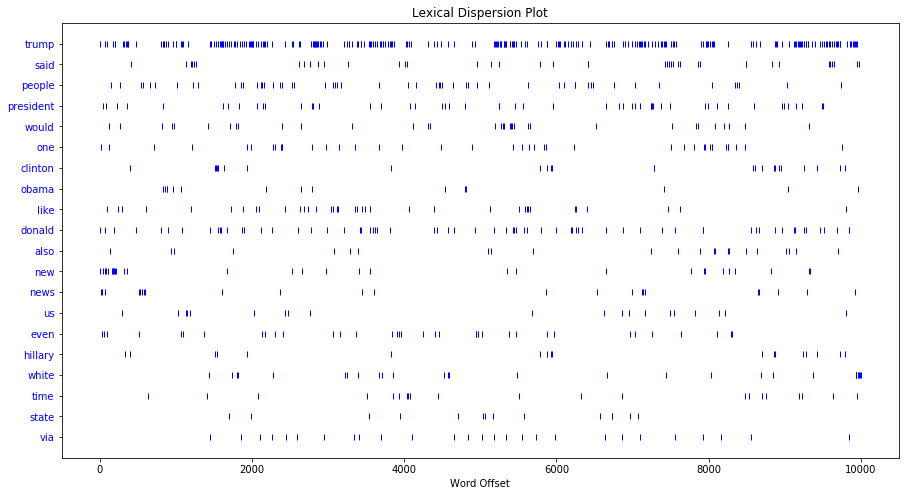

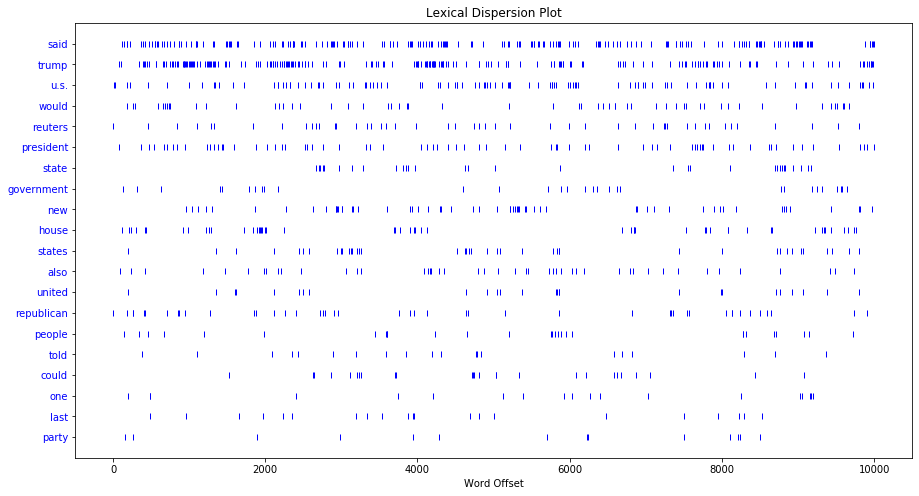

In [21]:
common_words_fake = [item[0] for item in vocab_fake.most_common(20)]
nltk.Text(fake_list[:10000]).dispersion_plot(common_words_fake)

common_words_real = [item[0] for item in vocab_real.most_common(20)]
nltk.Text(real_list[:10000]).dispersion_plot(common_words_real)

In [22]:
vectorizer = TfidfVectorizer(stop_words=sw,lowercase=True)
y = news_data.Authenticity
x = vectorizer.fit_transform(news_data.text)

In [23]:
print (x.shape)
print (y.shape)

(44898, 121858)
(44898,)


In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Text(315.06, 0.5, 'predicted label')

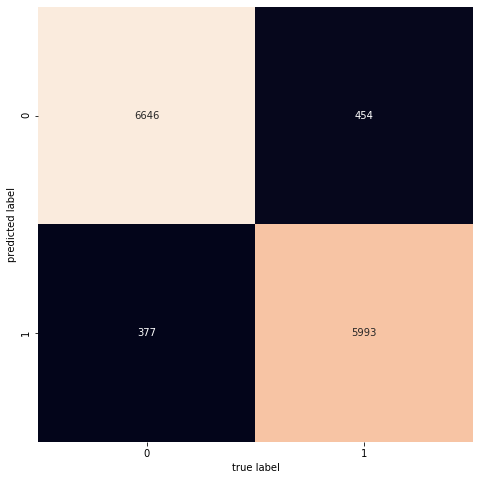

In [25]:
labels = NB_classifier.predict(X_test)

mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [26]:
roc_auc_score(y_test,NB_classifier.predict_proba(X_test)[:,1])

0.9819979583137953

In [27]:
print(classification_report(y_test,labels))

              precision    recall  f1-score   support

        Fake       0.94      0.95      0.94      7023
        Real       0.94      0.93      0.94      6447

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
model.score(X_test, y_test)

0.9866369710467706

Text(315.06, 0.5, 'true value')

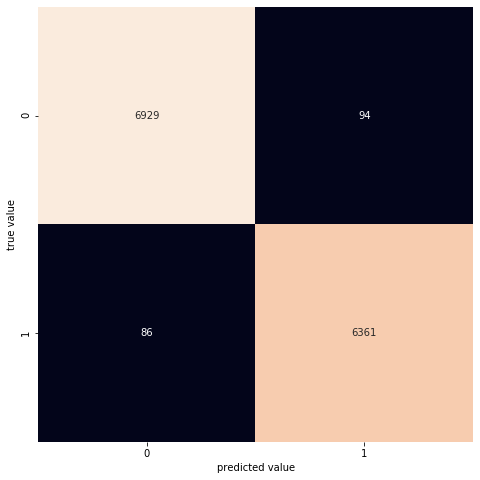

In [30]:
y_model = model.predict(X_test)

mat = confusion_matrix(y_test,y_model)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('predicted value')
plt.ylabel('true value')

In [31]:
print(classification_report(y_test,y_model))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7023
        Real       0.99      0.99      0.99      6447

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

